In [8]:
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


## The wine recognition data 
This (https://archive.ics.uci.edu/ml/datasets/wine) is a one of the classic datasets.

Each row corresponds to a particular bottle of wine. Each wine is characterized by 13 numericcal attributes
 
#### The attributes 
1. Class = type of wine, can be 1,2 or 3, In this notebook we ignore class.
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline            


In [9]:
!ls data

wine.data


In [10]:
df=pd.read_csv('data/wine.data',header=None)

df.columns=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',\
'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315','Proline']
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The `df.describe()` method in pandas provides summary statistics for each column in the dataframe `df`

In [11]:
desc=df.describe()
desc

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
def plot_stat(Col,_title='',_range=[],height=20):
    Col.hist(bins=20)
    _mean=Col.mean()
    _std=Col.std()
    for x in [_mean,_mean-_std,_mean+_std]:
        plot([x,x],[0,height])
        if len(_range)==2:
            xlim(_range)
    title(_title)

In [13]:
def plot_normal(s):
    count, bins, ignored = plt.hist(s, 30, density=True);
    sigma=std(s); mu=mean(s)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                   np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r');

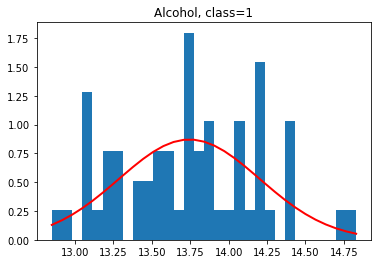

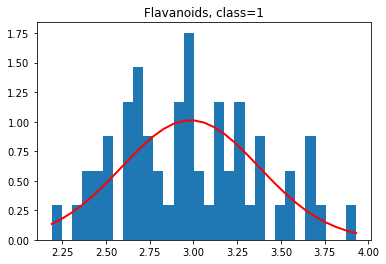

<Figure size 432x288 with 0 Axes>

In [14]:
j=1
_class=1
rdf=df[df['class']==_class]
for name in ['Alcohol','Flavanoids']:
    plot_normal(rdf[name])
    title('%s, class=%d'%(name,_class))
    figure()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy.stats import multivariate_normal


In [16]:
def scatterAndGauss(rdf,Feat1,Feat2,_cov,_mean):
    fig, ax = plt.subplots()
    scatter = ax.scatter(rdf[Feat1],rdf[Feat2],c=rdf['class'])
    xlabel(Feat1)
    ylabel(Feat2)

    plot(_mean[0],_mean[1],'X')
    N    = 200
    X    = np.linspace(12.5, 15, N)
    Y    = np.linspace(2, 4, N)
    X, Y = np.meshgrid(X, Y)
    pos  = np.dstack((X, Y))
    rv   = multivariate_normal(_mean, _cov)
    Z    = rv.pdf(pos)

    plt.contour(X, Y, Z,5)
#    plt.show()

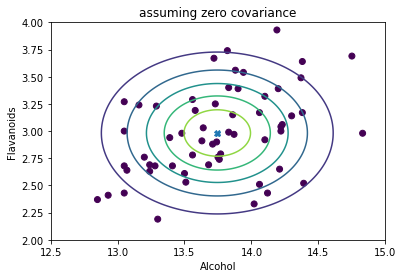

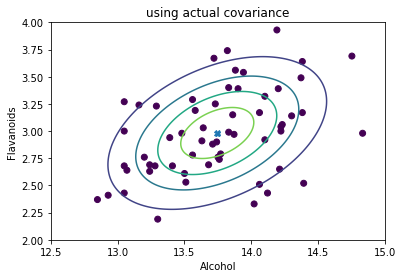

In [17]:
Feat1='Alcohol'
Feat2='Flavanoids'
subset=rdf[[Feat1,Feat2]]
_cov=np.array(subset.cov())
_cov[1,0]=0
_cov[0,1]=0
_mean=np.array(subset.mean())
scatterAndGauss(rdf,Feat1,Feat2,_cov,_mean)
title('assuming zero covariance')
_cov=np.array(subset.cov())
scatterAndGauss(rdf,Feat1,Feat2,_cov,_mean)
title('using actual covariance');

In [18]:
rdf.iloc[:,1:].corr()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
Alcohol,1.000000,-0.040513,-0.148595,-0.318367,0.159361,0.420687,0.414904,0.015659,0.307571,0.408291,0.080020,0.069818,0.360646
Malic acid,-0.040513,1.000000,0.026221,0.060031,0.079317,-0.083514,-0.191278,-0.089366,-0.080798,-0.257587,-0.419981,0.173244,-0.372629
Ash,-0.148595,0.026221,1.000000,0.549330,0.382549,0.004802,-0.070454,0.465901,-0.145471,-0.124220,0.239214,-0.081593,-0.029525
Alcalinity of ash,-0.318367,0.060031,0.549330,1.000000,0.238337,-0.222999,-0.287103,0.302262,-0.173628,-0.210951,0.092980,-0.117704,-0.122436
Magnesium,0.159361,0.079317,0.382549,0.238337,1.000000,0.307241,0.123332,0.237248,-0.059042,0.184661,-0.111386,0.120651,-0.147912
Total phenols,0.420687,-0.083514,0.004802,-0.222999,0.307241,1.000000,0.803784,-0.016992,0.373601,0.650086,-0.224330,0.053165,0.294994
Flavanoids,0.414904,-0.191278,-0.070454,-0.287103,0.123332,0.803784,1.000000,-0.089538,0.548624,0.741560,0.007863,-0.088529,0.380446
Nonflavanoid phenols,0.015659,-0.089366,0.465901,0.302262,0.237248,-0.016992,-0.089538,1.000000,-0.144535,-0.152460,0.411831,-0.323488,-0.015333
Proanthocyanins,0.307571,-0.080798,-0.145471,-0.173628,-0.059042,0.373601,0.548624,-0.144535,1.000000,0.424696,0.103937,0.003106,0.142166
Color intensity,0.408291,-0.257587,-0.124220,-0.210951,0.184661,0.650086,0.741560,-0.152460,0.424696,1.000000,0.028228,-0.186899,0.588770


### HW
* For each of the following three pairs of features compute 
   * the mean and std of each feature,
   * the covariance and correlation coefficient of the pair. 
   * Use `scatterAndGauss()` to generate scatter-figures and contours og the fitted Gaussian.

1. The pair of features (in `rdf`) is most correlated (excluding the correlation of a feature with itself which is always zero)
2. pair of features is most anti-correlated.
3. the pair of features that are least correlated(correlation coefficient closest to zero)


# New Section

In [19]:
# the first step is to find the most correlated, most uncorrelated and most anticorrelated pairs:

the_corr = rdf.iloc[:,1:].corr()
n = the_corr.shape[0]
masked_corr = the_corr.mask(np.eye(n, dtype=bool))

the_tuples = []

for x1, x1_corr in masked_corr.iteritems():
    for x2, x2_corr in x1_corr.iteritems():
        #print(x2_corr)
        if not np.isnan(x2_corr):
            the_tuples.append([x1, x2, 2 ])
          

the_most_corr_pairs = max(the_tuples, key=lambda x: x[2])
the_most_anticorr_pairs = min (the_tuples, key=lambda x: x[2])
the_most_uncorr_pairs = min(the_tuples, key=lambda x: abs(x[2]))

print ('The most correlated: ', the_most_corr_pairs)
print ('The most anticorrelated: ', the_most_anticorr_pairs)
print ('The most uncorrelated: ', the_most_uncorr_pairs)



The most correlated:  ['Alcohol', 'Malic acid', 2]
The most anticorrelated:  ['Alcohol', 'Malic acid', 2]
The most uncorrelated:  ['Alcohol', 'Malic acid', 2]


In [20]:
x1 = the_most_corr_pairs[0]
x2 = the_most_corr_pairs[1]

def compute_stats_then_graph (x1, x2):
    for feat in [x1, x2]:
        print(f"Mean for feature '{feat}': {df[feat].mean()}")
        print (f"Standard Deviation of '{feat}': {df[feat].std()}")
        print()
    print(f"Cov of '{x1}' and '{x2}':")
    print(df[[x1, x2]].cov())
    print()
    print(f"Corr of '{x1}' and '{x2}':")
    print(df[[x1, x2]].corr())
    
    subset = rdf[[x1, x2]]
    mean = np.array(subset.mean())
    scatterAndGauss(rdf, x1, x2, np.eye(2), mean)
    title('assuming zero covariance')
    cov=np.array(subset.cov())
    scatterAndGauss(rdf, x1, x2, cov, mean)
    title('using actual covariance');
    


********MOST CORRELATED:***********

Mean for feature 'Alcohol': 13.00061797752809
Standard Deviation of 'Alcohol': 0.8118265380058575

Mean for feature 'Malic acid': 2.3363483146067416
Standard Deviation of 'Malic acid': 1.1171460976144627

Cov of 'Alcohol' and 'Malic acid':
             Alcohol  Malic acid
Alcohol     0.659062    0.085611
Malic acid  0.085611    1.248015

Corr of 'Alcohol' and 'Malic acid':
             Alcohol  Malic acid
Alcohol     1.000000    0.094397
Malic acid  0.094397    1.000000


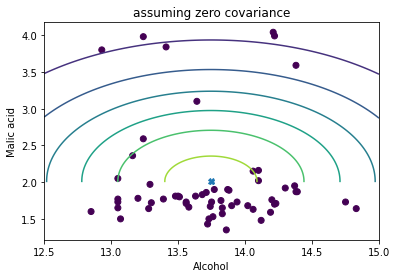

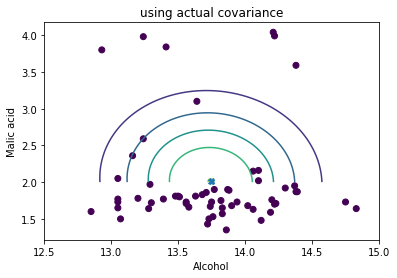

In [21]:
print()
print('********MOST CORRELATED:***********')
print()
compute_stats_then_graph(the_most_corr_pairs[0], the_most_corr_pairs[1])


***********MOST UNCORRELATED:************

Mean for feature 'Alcohol': 13.00061797752809
Standard Deviation of 'Alcohol': 0.8118265380058575

Mean for feature 'Malic acid': 2.3363483146067416
Standard Deviation of 'Malic acid': 1.1171460976144627

Cov of 'Alcohol' and 'Malic acid':
             Alcohol  Malic acid
Alcohol     0.659062    0.085611
Malic acid  0.085611    1.248015

Corr of 'Alcohol' and 'Malic acid':
             Alcohol  Malic acid
Alcohol     1.000000    0.094397
Malic acid  0.094397    1.000000


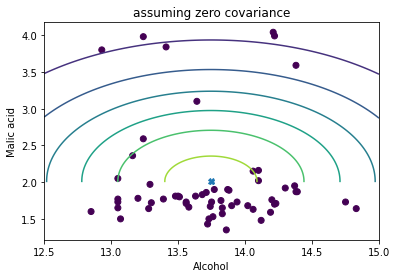

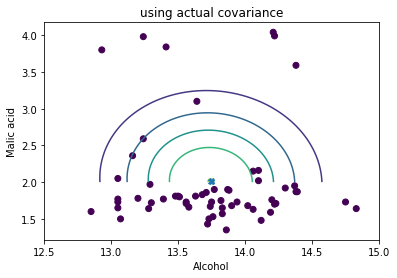

In [22]:
print()
print('***********MOST UNCORRELATED:************')
print()
compute_stats_then_graph(the_most_uncorr_pairs[0], the_most_uncorr_pairs[1])


************MOST ANTICORRELATED:*************

Mean for feature 'Alcohol': 13.00061797752809
Standard Deviation of 'Alcohol': 0.8118265380058575

Mean for feature 'Malic acid': 2.3363483146067416
Standard Deviation of 'Malic acid': 1.1171460976144627

Cov of 'Alcohol' and 'Malic acid':
             Alcohol  Malic acid
Alcohol     0.659062    0.085611
Malic acid  0.085611    1.248015

Corr of 'Alcohol' and 'Malic acid':
             Alcohol  Malic acid
Alcohol     1.000000    0.094397
Malic acid  0.094397    1.000000


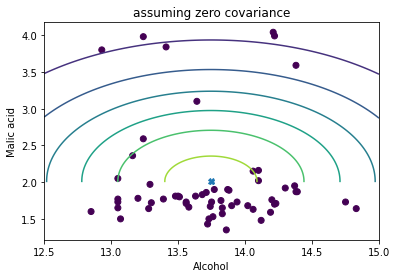

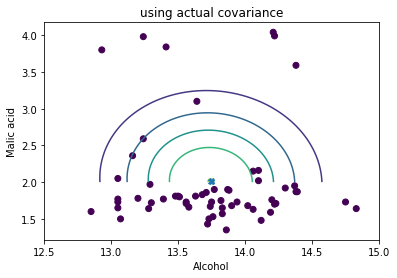

In [23]:
print()
print('************MOST ANTICORRELATED:*************')
print()
compute_stats_then_graph(the_most_anticorr_pairs[0], the_most_anticorr_pairs[1])